 # Mean Absolute Error on Test Data Set using first nueral network  = 2.094420909881592 miles per gallon


#  improved accuracy Mean Absolute Error on Test Data Set = 1.925119400024414 miles per gallon


In [1]:
import pandas as pd
import pathlib 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 

In [2]:
 # data path for the Auto-Mpg data set 
datasetPath = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
 
  # olumn names for the data set
columnNames = ['MPG', 'Cylinders','Displacement','Horsepower','Weight',
               'Acceleration','Model Year','Origin']
 
  # Importing the data set
originalData = pd.read_csv(datasetPath, names=columnNames, na_values = "?", 
                           comment='\t', sep=" ", skipinitialspace=True)
                        

40960/30286 [========================================] - 0s 0us/step


In [3]:
print("Original Data Set Excerpt")
originalData.head()
 

Original Data Set Excerpt


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
  data = originalData.copy()


In [5]:
  # Count how many NAs each data attribute has
  print("Number of NAs in the data set")
  print(data.isna().sum())
 
 

Number of NAs in the data set
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [6]:
 # Now, let's remove the NAs from the data set
data = data.dropna()

In [7]:
  # Perform one-hot encoding on the Origin attribute 
  # since it is a categorical variable
origin = data.pop('Origin') # Return item and drop from frame
data['USA'] = (origin == 1) * 1.0
data['Europe'] = (origin == 2) * 1.0
data['Japan'] = (origin == 3) * 1.0

In [8]:
originalData['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

In [9]:
origin 

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [10]:
originalData['Origin'].unique()
data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0


In [11]:
  # Generate a training data set (80% of the data) and a testing set (20% of the data)
trainingData = data.sample(frac = 0.8, random_state = 0)
 
  # Generate a testing data set
testingData = data.drop(trainingData.index)
 

In [12]:
  # Separate the attributes from the label in both the testing and training data. 
trainingLabelData = trainingData.pop('MPG')
testingLabelData = testingData.pop('MPG')
   

In [13]:
     
# Normalize the data set using the mean and standard deviation 
def normalize(data):
  statistics = data.describe()
  statistics = statistics.transpose()
  return(data - statistics['mean']) / statistics['std']

In [14]:
  # Normalize the data
normalizedTrainingData = normalize(trainingData)
normalizedTestingData = normalize(testingData)
  #print(normalizedTrainingData.head()) 

In [15]:
 #Generate the neural network
def generateNeuralNetwork(trainingData):

  neuralNet = keras.Sequential([

    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(trainingData.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1) 
  ])
 
  optimizer = keras.optimizers.RMSprop(0.001) 
  neuralNet.compile(loss = 'mean_squared_error',
                optimizer = optimizer,
                metrics = ['mean_absolute_error', 'mean_squared_error'])
  return neuralNet

In [16]:
# Generate the neural network
neuralNet = generateNeuralNetwork(trainingData)
neuralNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [17]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

In [18]:
  EPOCHS = 1000
  history = neuralNet.fit(
    x = normalizedTrainingData, 
    y = trainingLabelData,
    epochs = EPOCHS, 
    validation_split = 0.2, 
    verbose = 0,
    callbacks = [PrintDot()]
  )   
   


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [19]:
# Plot metrics for the neural network  
def plotNeuralNetMetrics(history):
  neuralNetMetrics = pd.DataFrame(history.history)
  neuralNetMetrics['epoch'] = history.epoch
   
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(neuralNetMetrics['epoch'], 
           neuralNetMetrics['mean_absolute_error'],
           label='Train Error')
  plt.plot(neuralNetMetrics['epoch'], 
           neuralNetMetrics['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
   
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(neuralNetMetrics['epoch'], 
           neuralNetMetrics['mean_squared_error'],
           label='Train Error')
  plt.plot(neuralNetMetrics['epoch'], 
           neuralNetMetrics['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
   

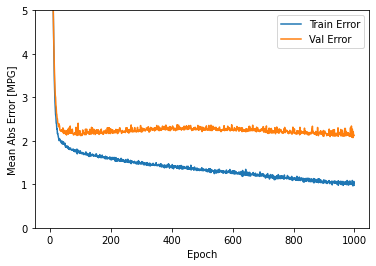

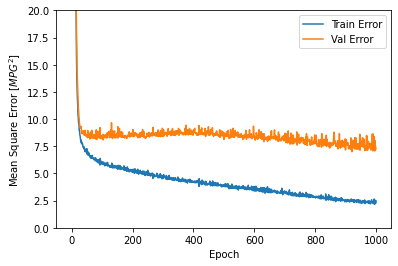

In [20]:
plotNeuralNetMetrics(history)


In [21]:
def generateNeuralNetwork(trainingData):

  neuralNet = keras.Sequential([
   
    
    layers.Dense(64, activation=tf.nn.relu, input_shape=[len(trainingData.keys())]),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(1) # This output layer is a single, continuous value (i.e. Miles per gallon)
  ])
  optimizer = keras.optimizers.RMSprop(0.001)
  
  neuralNet.compile(loss = 'mean_squared_error',
                optimizer = optimizer,
                metrics = ['mean_absolute_error', 'mean_squared_error'])
  return neuralNet
     

In [22]:
  # Generate another neural network so that we can use early stopping
neuralNet2 = generateNeuralNetwork(trainingData)
   

In [23]:

# Plot predictions vs. true values
def plotTestingDataPredictions(testingLabelData, testingDataPredictions):
 
  # Plot the data points (x, y)
  plt.scatter(testingLabelData, testingDataPredictions)
   
  # Label the axes
  plt.xlabel('True Values (Miles per gallon)')
  plt.ylabel('Predicted Values (Miles per gallon)')
 
  # Plot a line between (0,0) and (50,50) 
  point1 = [0, 0]
  point2 = [50, 50]
  xValues = [point1[0], point2[0]] 
  yValues = [point1[1], point2[1]]
  plt.plot(xValues, yValues) 
   
  # Set the x and y axes limits
  plt.xlim(0, 50)
  plt.ylim(0, 50)
 
  plt.gca().set_aspect('equal', adjustable='box')
   
  # Show the plot
  plt.show()
   

In [24]:
# Normalize the data set using the mean and standard deviation 
def normalize(data):
  statistics = data.describe()
  statistics = statistics.transpose()
  return(data - statistics['mean']) / statistics['std']
 
# Plot metrics for the neural network  
def plotNeuralNetMetrics(history):
  neuralNetMetrics = pd.DataFrame(history.history)
  neuralNetMetrics['epoch'] = history.epoch
   
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(neuralNetMetrics['epoch'], 
           neuralNetMetrics['mean_absolute_error'],
           label='Train Error')
  plt.plot(neuralNetMetrics['epoch'], 
           neuralNetMetrics['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
   
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(neuralNetMetrics['epoch'], 
           neuralNetMetrics['mean_squared_error'],
           label='Train Error')
  plt.plot(neuralNetMetrics['epoch'], 
           neuralNetMetrics['val_mean_squared_error'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()
   
# Plot prediction 

In [25]:
def plotPredictionError(testingLabelData, testingDataPredictions):
 
  # Error = Predicted - Actual
  error = testingDataPredictions - testingLabelData
   
  plt.hist(error, bins = 50)
  plt.xlim([-10,10])
  plt.xlabel("Predicted MPG - Actual MPG")
  _ = plt.ylabel("Count")
  plt.show()

In [26]:
print(neuralNet.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
None


#high validation error shows the overfitting 

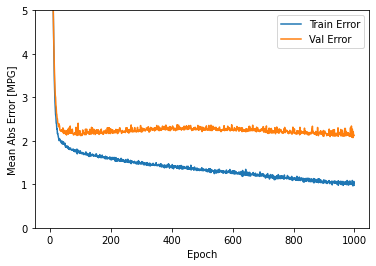

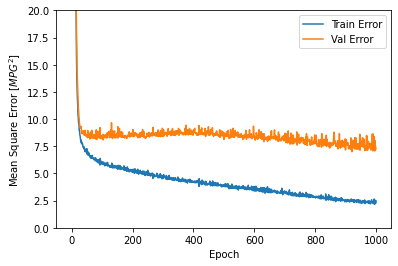

In [27]:
plotNeuralNetMetrics(history)

In [28]:
loss, meanAbsoluteError, meanSquaredError = neuralNet.evaluate(
    x = normalizedTestingData,
    y = testingLabelData,
    verbose = 0
  )

In [29]:
print(f'\nMean Absolute Error on Test Data Set using first nueral network  = {meanAbsoluteError} miles per gallon') 


Mean Absolute Error on Test Data Set using first nueral network  = 1.9100942611694336 miles per gallon


In [30]:
 #Generate another neural network so that we can use early stoppingneuralNet2 = generateNeuralNetwork(trainingData)
   
  # We want to stop training the model when the 
  # validation error stops improving.
earlyStopping = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)
 
history2 = neuralNet2.fit(
x = normalizedTrainingData, 
y = trainingLabelData,
epochs = EPOCHS, 
validation_split = 0.2, 
verbose = 0,
callbacks = [earlyStopping, PrintDot()]
  )    
 


.............................................................


#improved accuracy 



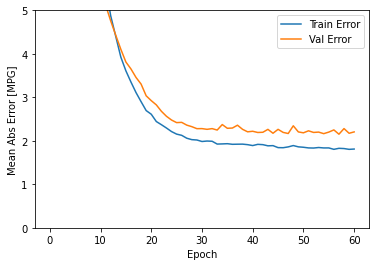

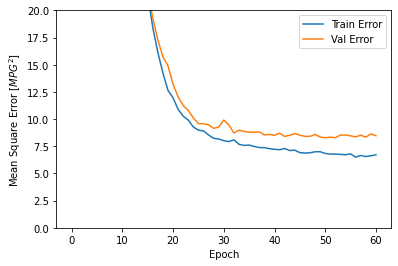

In [31]:
plotNeuralNetMetrics(history2) 

In [32]:
loss, meanAbsoluteError, meanSquaredError = neuralNet2.evaluate(
    x = normalizedTestingData,
    y = testingLabelData,
    verbose = 0
  )

In [33]:
print(f'\nMean Absolute Error on Test Data Set = {meanAbsoluteError} miles per gallon') 


Mean Absolute Error on Test Data Set = 1.8722103834152222 miles per gallon
